In [1]:
from transformers import AddTime, LeadLag
import iisignature
import numpy as np
from rbergomi import rBergomi
from utils import bsinv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from fbm import FBM
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
vec_bsinv = np.vectorize(bsinv)

In [2]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [3]:
prices = []
params = np.linspace(0.1, 0.8, 50)
N = 10

for a in params:
#     rB = rBergomi(n = 100, N = 100, T = 1.0, a = a)
#     np.random.seed(0)
#     dW1 = rB.dW1()
#     dW2 = rB.dW2()
#     Y = rB.Y(dW1)
#     dB = rB.dB(dW1, dW2, rho = -0.5)
#     V = rB.V(Y, xi = 0.5, eta = 0.5) 
#     S = rB.S(V, dB)
#     prices.append(Y)
    
    intermediate = []
    f = FBM(n=100, hurst=a, length=1, method='daviesharte')
    for k in range(N):
        intermediate.append(f.fbm())
    prices.append(np.array(intermediate))

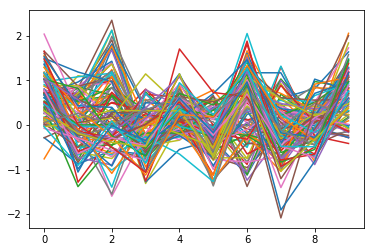

In [4]:
plt.plot(prices[1])
plt.show()

In [5]:
P = [LeadLag().fit_transform(p) for p in prices]
# P = [p.sum(0)/len(p) for p in prices]
X_train, X_test, y_train, y_test = train_test_split(P, params, test_size=0.33, random_state=42)

In [6]:
depth = 2

In [7]:
X_train[0][0].shape

(201, 2)

In [8]:
# ES_train = [iisignature.sig(x, depth).sum(0)/len(x) for x in X_train]
# ES_test = [iisignature.sig(x, depth).sum(0)/len(x) for x in X_test]

ES_train = [iisignature.sig(iisignature.sig(x, depth, 2).sum(0)/len(x), depth) for x in X_train]
ES_test = [iisignature.sig(iisignature.sig(x, depth, 2).sum(0)/len(x), depth) for x in X_test]

In [9]:
ES_train[0].shape

(42,)

In [10]:
params

array([0.1       , 0.11428571, 0.12857143, 0.14285714, 0.15714286,
       0.17142857, 0.18571429, 0.2       , 0.21428571, 0.22857143,
       0.24285714, 0.25714286, 0.27142857, 0.28571429, 0.3       ,
       0.31428571, 0.32857143, 0.34285714, 0.35714286, 0.37142857,
       0.38571429, 0.4       , 0.41428571, 0.42857143, 0.44285714,
       0.45714286, 0.47142857, 0.48571429, 0.5       , 0.51428571,
       0.52857143, 0.54285714, 0.55714286, 0.57142857, 0.58571429,
       0.6       , 0.61428571, 0.62857143, 0.64285714, 0.65714286,
       0.67142857, 0.68571429, 0.7       , 0.71428571, 0.72857143,
       0.74285714, 0.75714286, 0.77142857, 0.78571429, 0.8       ])

In [11]:
svr = GridSearchCV(SVR(kernel='linear'),
                   param_grid={"C": [0.0001, 1e4],
                               "gamma": ['auto']})

# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
#                   param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-2, 2, 5)})

In [12]:
svr.fit(ES_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 10000.0], 'gamma': ['auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    print(names)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [35]:
svr.best_estimator_.coef_[0]

array([-3.46888796e-05, -3.63986305e-05, -9.43435234e-05,  3.09057076e-03,
       -3.27925781e-03, -4.71690754e-05,  2.03799496e-05,  3.17918825e-04,
       -3.84023761e-05, -4.87375631e-04,  3.23331395e-04, -1.03894508e-04,
       -2.70724707e-04,  1.94876615e-05,  3.16755067e-05, -2.43933463e-04,
        2.20044993e-04, -3.27527542e-05, -3.22629128e-05, -9.77550450e-05,
       -1.54370551e-05,  8.98340487e-04, -8.04855509e-04,  1.12419663e-04,
        1.86388804e-04,  9.91493214e-05,  5.83451521e-04,  1.11910736e-03,
        1.75449606e-04,  7.07810609e-04, -1.63675147e-04, -2.07419928e-04,
       -7.38684719e-04,  5.49919689e-04, -1.90622488e-03, -6.07330371e-04,
        2.75868174e-05, -3.68414435e-05, -1.19095309e-04,  7.48402766e-04,
       -8.62234297e-04,  7.84520426e-06])

('4', '34', '40', '22', '32', '35', '9', '12', '15', '31', '30', '38', '11', '19', '2', '5', '8', '37', '1', '0', '17', '18', '20', '41', '13', '6', '36', '14', '25', '23', '28', '24', '16', '7', '10', '33', '26', '29', '39', '21', '27', '3')


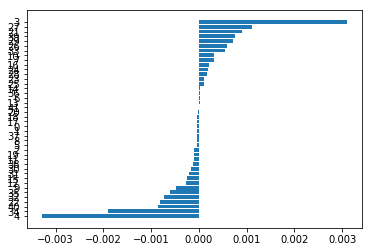

In [38]:
f_importances(svr.best_estimator_.coef_[0], np.array([str(k) for k in range(len(ES_train[0]))]).reshape(42))

In [39]:
y_svr = svr.predict(ES_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


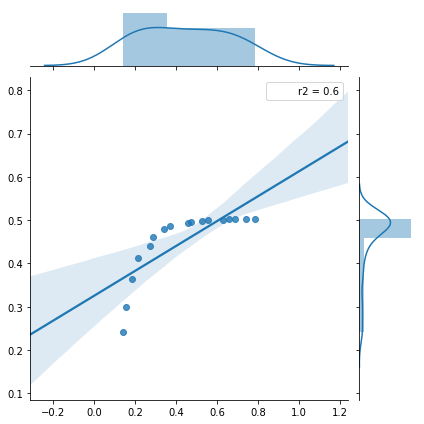

In [40]:
sns.jointplot(y_test, y_svr, kind="reg", stat_func=r2)
plt.show()

In [207]:
y_test

array([-0.14848485, -0.23939394, -0.18787879, -0.26363636, -0.26666667,
       -0.28181818, -0.33333333, -0.15757576, -0.36969697, -0.4       ,
       -0.34545455, -0.30909091, -0.17878788, -0.3       , -0.12727273,
       -0.38787879, -0.16969697, -0.16666667, -0.36363636, -0.30606061,
       -0.23333333, -0.13333333, -0.32121212, -0.27272727, -0.19090909,
       -0.35454545, -0.27878788, -0.10909091, -0.37272727, -0.18181818,
       -0.36666667, -0.25757576, -0.14242424])

In [166]:
y_svr

array([-0.20251764, -0.22012866, -0.20824867, -0.22712342, -0.2280429 ,
       -0.23273129, -0.24893624, -0.20355682, -0.27135029, -0.29629591,
       -0.2537641 , -0.24123007, -0.20664893, -0.23841714, -0.20078721,
       -0.29208795, -0.20521172, -0.20476963, -0.26549919, -0.24029531,
       -0.21850265, -0.20118132, -0.24497392, -0.2299031 , -0.20881716,
       -0.25868789, -0.23178494, -0.20008588, -0.27465938, -0.20716437,
       -0.26829021, -0.2253102 , -0.20192324])